<a href="https://colab.research.google.com/github/sudar-coder321/KNN-Classifier_ScratchVsSkLearn/blob/main/KNN_ML%26DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Machine Learning and Data Mining** 
###&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Assignment-1** 

  #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sudarshan.M.S[CB.EN.U4CSE18258]

#### **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import mode
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### **Defining a Naive implementatiom of KNN Classifier using Class based Implementation**

In [ ]:
class K_Nearest_Neighbors_Classifier() :  
    
    def __init__(self, K, ch) :  
        self.K = K 
        self.ch = ch
          
    def fit(self, X_train, Y_train) :   
        self.X_train = X_train 
        self.Y_train = Y_train 
        self.m, self.n = X_train.shape 
      
    def predict(self, X_test) : 
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape 
        Y_predict = np.zeros(self.m_test)  
        for i in range(self.m_test): 
            x = self.X_test[i] 
            neighbors = np.zeros(self.K) 
            neighbors = self.find_neighbors(x) 
            Y_predict[i] = mode(neighbors)[0][0]     
        return Y_predict 

    def find_neighbors(self, x) : 
        distances = np.zeros(self.m)     
        for i in range(self.m):
            if (self.ch==0):
                d = self.euclidean(x, self.X_train[i])
                distances[i] = d
            elif (self.ch==1):
                d = self.Manhattan_dis(x, self.X_train[i]) 
                distances[i] = d
        inds = distances.argsort() 
        Y_train_sorted = self.Y_train[inds]  
        return Y_train_sorted[:self.K] 
    
    def euclidean(self, x, x_train) :     
        return np.sqrt(np.sum(np.square(x - x_train)))
    
    def Manhattan_dis(self, x, x_train):
        return np.sum(abs(x-x_train))

#### **Calculating Accuracy of the Model Using 3 Methods -** 
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(i) Using Euclidean Distance
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(ii) Using Manhattan Distance 
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(iii) Using skLearn Library

In [ ]:
df=sns.load_dataset('iris')
label_encoder = preprocessing.LabelEncoder() 
df['species']= label_encoder.fit_transform(df['species'])
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
model = K_Nearest_Neighbors_Classifier(K = 3, ch = 0)
model.fit(X_train, Y_train)
model1 = K_Nearest_Neighbors_Classifier(K = 3, ch = 1)
model1.fit(X_train, Y_train)
model2 = KNeighborsClassifier(n_neighbors = 3) 
model2.fit(X_train, np.ravel(Y_train,order='C'))
Y_pred = model.predict(X_test)
Y_pred1 = model1.predict(X_test)
Y_pred2 = model2.predict(X_test) 
correctly_classified = 0
correctly_classified1 = 0
correctly_classified2 = 0
count = 0
for count in range(np.size(Y_pred)) : 
    if Y_test[count] == Y_pred[count] : 
            correctly_classified = correctly_classified + 1
    if Y_test[count] == Y_pred1[count] : 
            correctly_classified1 = correctly_classified1 + 1
    if Y_test[count] == Y_pred2[count] : 
            correctly_classified2 = correctly_classified2 + 1
    count = count + 1
print("Accuracy on test set by our model using Euclidean Distance:  ", (correctly_classified / count) * 100) 
print("Accuracy on test set by our model using Manhattan Distance:  ", (correctly_classified1 / count) * 100)
print("Accuracy on test set by sklearn model:  ", (correctly_classified2 / count) * 100) 

Accuracy on test set by our model using Euclidean Distance:   86.66666666666667
Accuracy on test set by our model using Manhattan Distance:   86.66666666666667
Accuracy on test set by sklearn model:   90.0


In [ ]:
Euclidean_accuracy = []
for i in range(3, round(np.sqrt(len(X_train)))):
    model = K_Nearest_Neighbors_Classifier(i, 0)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    correctly_classified = 0
    for count in range(np.size(Y_pred)) : 
        if Y_test[count] == Y_pred[count] : 
            correctly_classified = correctly_classified + 1
        count = count+1
    Euclidean_accuracy.append((correctly_classified / count) * 100)
print(Euclidean_accuracy)

[86.66666666666667, 93.33333333333333, 90.0, 86.66666666666667, 86.66666666666667, 90.0, 90.0, 90.0]


In [ ]:
Manhattan_accuracy = []
for i in range(3, round(np.sqrt(len(X_train)))):
    model = K_Nearest_Neighbors_Classifier(i, 1)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    correctly_classified = 0
    for count in range(np.size(Y_pred)) : 
        if Y_test[count] == Y_pred[count] : 
            correctly_classified = correctly_classified + 1
        count = count+1
    Manhattan_accuracy.append((correctly_classified / count) * 100)
print(Manhattan_accuracy)

[86.66666666666667, 86.66666666666667, 90.0, 86.66666666666667, 83.33333333333334, 83.33333333333334, 90.0, 86.66666666666667]


In [ ]:
sklearn_accuracy = []
for i in range(3, round(np.sqrt(len(X_train)))):
    model = KNeighborsClassifier(n_neighbors = i) 
    model.fit(X_train, np.ravel(Y_train,order='C'))
    Y_pred = model.predict(X_test)
    correctly_classified = 0
    for count in range(np.size(Y_pred)) : 
        if Y_test[count] == Y_pred[count] : 
            correctly_classified = correctly_classified + 1
        count = count+1
    sklearn_accuracy.append((correctly_classified / count) * 100)
print(sklearn_accuracy)

[90.0, 93.33333333333333, 90.0, 86.66666666666667, 86.66666666666667, 90.0, 90.0, 90.0]


#### **Plotting Values for the Distance Measures**

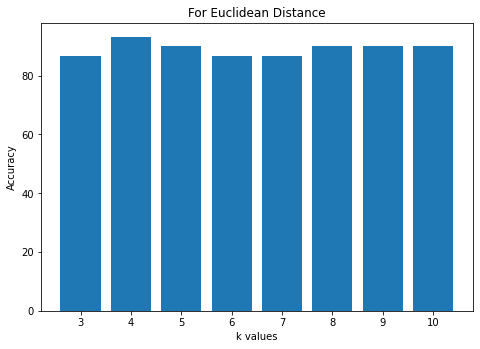

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
k = [i for i in range(3, round(np.sqrt(len(X_train))))]
ax.bar(k,Euclidean_accuracy)
ax.set_ylabel('Accuracy')
ax.set_xlabel('k values')
ax.set_title('For Euclidean Distance')
plt.show()

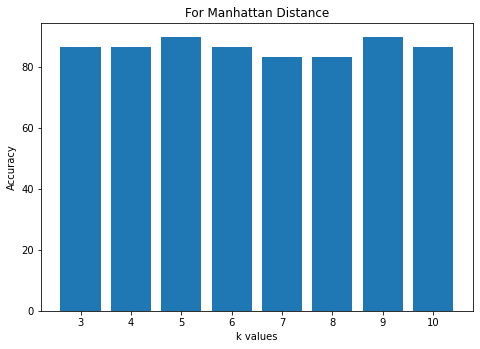

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.bar(k,Manhattan_accuracy)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('k values')
ax1.set_title('For Manhattan Distance')
plt.show()

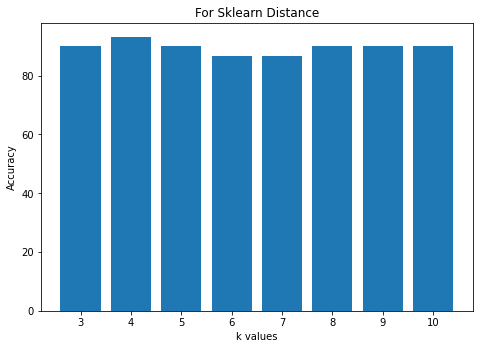

In [ ]:
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])
ax3.bar(k,sklearn_accuracy)
ax3.set_ylabel('Accuracy')
ax3.set_xlabel('k values')
ax3.set_title('For Sklearn Distance')
plt.show()

#### **Observations** 

###### We can observe that the manual implementation using Manhattan Distance is less in accurate compared to naive implementation using Euclidean Distance and the inbuilt function of sklearn.